In [ ]:
from util import *

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Loading all the documents in the cranfield dataset in the list
with open(r"..\cranfield\cran_docs.json", "r", encoding="utf-8") as file:
    data = json.load(file)
# documents is the list of all the documents in the cranfield dataset
documents = [item["body"] for item in data]
print("Total No. of documents in this list are",len(documents))

Total No. of documents in this list are 1400


In [4]:
def idf_stopwords(documents, percentile=5):
   """
   Creating the list of stopwords from cranfield corpus of documents
   using the percentile method.
   Observed that most words have the idf_score of 7
   Making them rarer words and having too low threshold for percentile
   ----------
   Arg1: Documents List
   Arg2: Threshold percentile
   Returns: Stopwords list
    """
   vectorizer = TfidfVectorizer(smooth_idf=True)
   matrix = vectorizer.fit_transform(documents)
   features = vectorizer.get_feature_names_out() # Vocabulary words
   idf_scores = vectorizer.idf_                  # IDF scores

  # Computing the 5th percentile threshold
   threshold = np.percentile(idf_scores, percentile)

  # Selecting stopwords with IDF in the 0 to 5 percentile range
   stopwords = [word for word, idf in zip(features, idf_scores) if idf < threshold]

   return stopwords , idf_scores

In [5]:
# Getting the stopwords list and idf scores from the documents list
corpus_based_stopwords , idf_scores = idf_stopwords(documents)

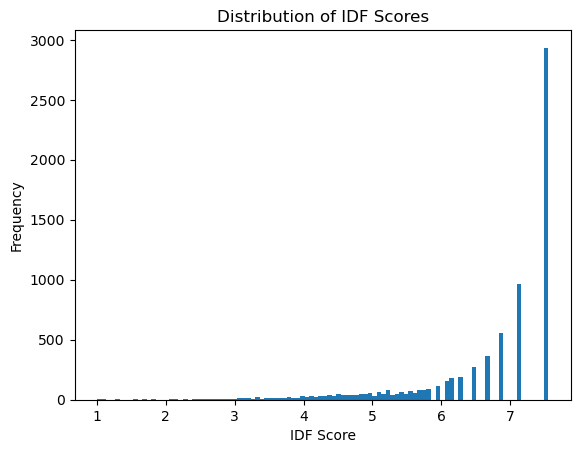

In [6]:
# Plotting the distribution of IDF scores
plt.hist(idf_scores, bins=100)
plt.xlabel("IDF Score")
plt.ylabel("Frequency")
plt.title("Distribution of IDF Scores")
plt.show()


In [7]:
print("Total No. of stopwords created are",len(corpus_based_stopwords))

Total No. of stopwords created are 364


In [8]:
# Stopwords from corpus
print(corpus_based_stopwords)

['10', 'about', 'above', 'account', 'accuracy', 'aerodynamic', 'agreement', 'air', 'aircraft', 'all', 'along', 'also', 'an', 'analysis', 'analytical', 'and', 'angle', 'angles', 'any', 'applicable', 'application', 'applied', 'approximate', 'approximately', 'approximation', 'arbitrary', 'are', 'as', 'associated', 'assumed', 'at', 'attack', 'available', 'axial', 'based', 'basis', 'be', 'been', 'behind', 'being', 'bending', 'between', 'blunt', 'bodies', 'body', 'both', 'boundary', 'buckling', 'but', 'by', 'calculated', 'calculation', 'calculations', 'can', 'case', 'cases', 'certain', 'characteristics', 'circular', 'coefficient', 'coefficients', 'compared', 'comparison', 'compressible', 'condition', 'conditions', 'cone', 'considered', 'constant', 'corresponding', 'critical', 'cross', 'cylinder', 'cylinders', 'cylindrical', 'data', 'density', 'derived', 'described', 'design', 'determine', 'determined', 'developed', 'development', 'different', 'differential', 'dimensional', 'direction', 'disc

In [ ]:
with open(r'\corpus_based_stopwords.json', 'w') as f:
    json.dump(corpus_based_stopwords, f)
